In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *;
from sklearn import datasets

In [4]:
df_wine = pd.read_csv("../DataSets/Wine.csv")
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
X = wine.data
y = wine.target

In [16]:
from tabulate import tabulate
test_size = [0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
result = []


knn = KNeighborsClassifier(n_neighbors= 3)
for i in test_size: 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= i, random_state= 42 )

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    Accuracy = accuracy_score(y_test,y_pred)

    result.append([i , Accuracy])

    table = tabulate(result, headers = ["test size", "accuracy"], tablefmt = "grid")

print(table)





+-------------+------------+
|   test size |   accuracy |
+=============+============+
|         0.1 |   0.833333 |
+-------------+------------+
|         0.2 |   0.805556 |
+-------------+------------+
|         0.3 |   0.740741 |
+-------------+------------+
|         0.4 |   0.666667 |
+-------------+------------+
|         0.5 |   0.640449 |
+-------------+------------+
|         0.6 |   0.672897 |
+-------------+------------+
|         0.7 |   0.688    |
+-------------+------------+
|         0.8 |   0.685315 |
+-------------+------------+
|         0.9 |   0.68323  |
+-------------+------------+


In [13]:
conmat = confusion_matrix(y_test, y_pred)
conmat

array([[56,  0,  0],
       [11, 37, 13],
       [17, 10, 17]])

In [15]:
report = classification_report(y_test, y_pred, target_names = wine.target_names)
report

'              precision    recall  f1-score   support\n\n     class_0       0.67      1.00      0.80        56\n     class_1       0.79      0.61      0.69        61\n     class_2       0.57      0.39      0.46        44\n\n    accuracy                           0.68       161\n   macro avg       0.67      0.66      0.65       161\nweighted avg       0.69      0.68      0.66       161\n'

In [22]:
df = pd.DataFrame(wine.data, columns = wine.feature_names) 
corrmt = df.corr()



<Axes: >

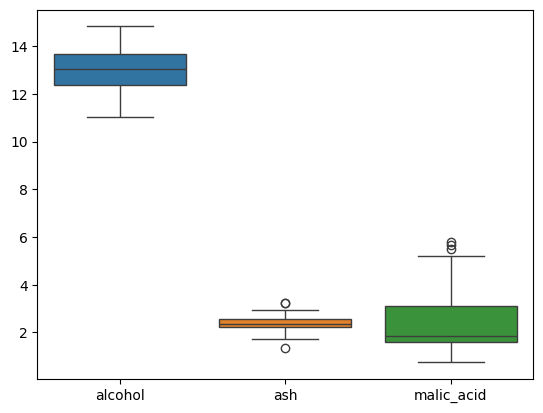

In [28]:
sns.boxplot(data = df[["alcohol", "ash", "malic_acid"]])